In [1]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import json
from classes import learn_class as lc
from importlib import reload

In [2]:
os.getcwd()

'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL'

In [3]:
code_dir = r'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL'
proj_dir = r'C:\\Users\\theod\\Desktop\\UCL\\Machine Learning\\Project'

# Agent plots

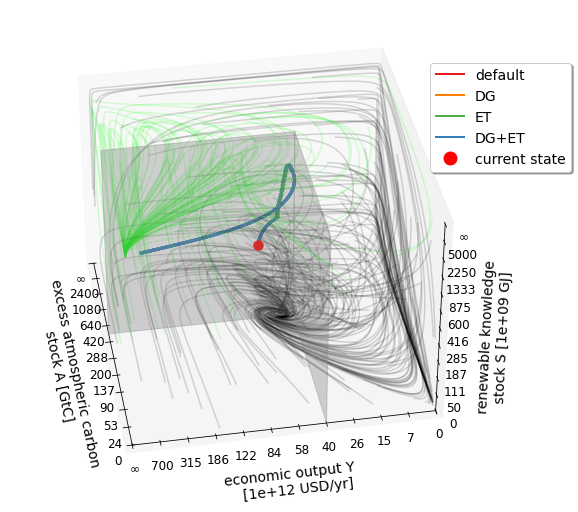

In [6]:
ppo = lc.Learning()
ppo.set_agent("PPO", pt_file_path=os.path.join(proj_dir, "models", "ppo_policy_net_3.0.pt"), second_path=os.path.join(proj_dir,"models", "ppo_critic_net_3.0.pt"))
ppo.plot_trajectory(fname=os.path.join(proj_dir, "overleaf images", "ppo_trajectory.png"))

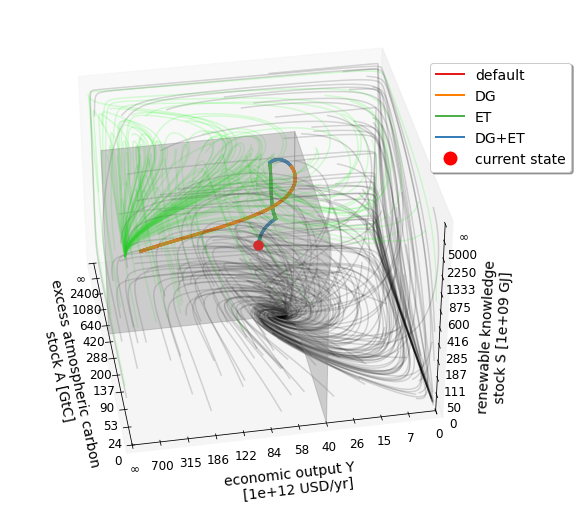

In [5]:
# plt.figure(figsize=(10,10))
dqn = lc.Learning()
dqn.set_agent("DQN", pt_file_path=os.path.join(proj_dir, "models", "dqn_target_net_2.0.pt"))
dqn.plot_trajectory(fname=os.path.join(proj_dir, "overleaf images", "dqn_trajectory.png"))

<Figure size 720x720 with 0 Axes>

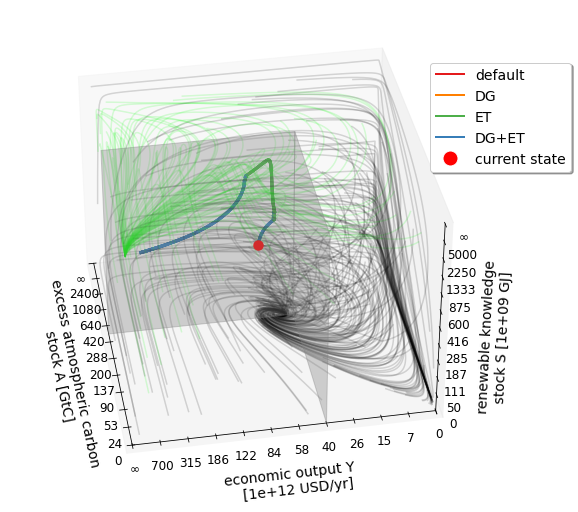

In [7]:
plt.figure(figsize=(10,10))
ddqn = lc.Learning()
ddqn.set_agent("DuelDDQN", pt_file_path=os.path.join(proj_dir, "models", "duelddqn_target_net_2.2.pt"))
ddqn.plot_trajectory(fname=os.path.join(proj_dir, "overleaf images", "ddqn_trajectory.png"))

<Figure size 720x720 with 0 Axes>

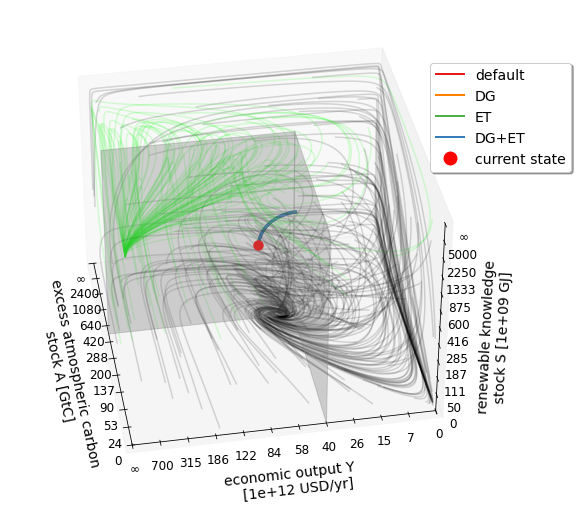

In [8]:
plt.figure(figsize=(10,10))
a2c = lc.Learning()
a2c.set_agent("A2C", pt_file_path=os.path.join(proj_dir, "models", "a2c_policy_net_0.pt"), second_path=os.path.join(proj_dir,"models", "a2c_critic_net_0.pt"))
a2c.plot_trajectory(fname=os.path.join(proj_dir, "overleaf images", "a2c_trajectory.png"))

# feature importance

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
import time
import numpy as np

In [21]:
sweep_dir = os.path.join(proj_dir, "sweeps")
ppo = os.path.join(sweep_dir, "PPO sweep.csv")

In [22]:
dfppo = pd.read_csv(ppo)

In [72]:
X = dfppo[["epsilon", "discount", "buffer_size", "batch_size", "clip", "labda", "max_epochs", "max_grad_norm", "lr_actor", "lr_critic", "critic_decay", "actor_decay"]]
y = dfppo["mean_reward"]
data = dfppo[["epsilon", "discount", "buffer_size", "batch_size", "clip", "labda", "max_epochs", "max_grad_norm", "lr_actor", "lr_critic", "critic_decay", "actor_decay", "mean_reward"]]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
feature_names = ["$\epsilon$", "$\gamma$", "buffer size", "batch size", "clip", "$\lambda$", "max epochs", "max grad norm", "lr actor", "lr critic", "critic decay", "actor decay"]
forest = ExtraTreesRegressor(n_estimators=100,
                             random_state=0)
forest.fit(X, y)

ExtraTreesRegressor(random_state=0)

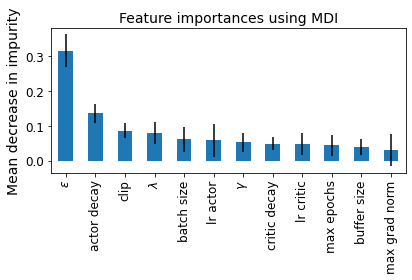

In [80]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<AxesSubplot:>

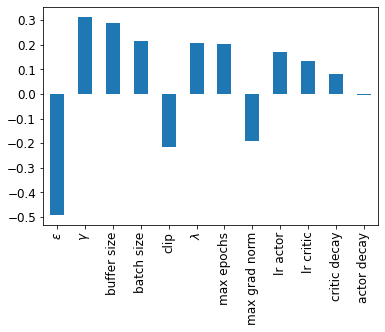

In [89]:
fig, ax = plt.subplots()
corrs = data.corr().mean_reward.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.index = feature_names
corrs.plot.bar(ax=ax)

# Big plots

In [4]:
with open(os.path.join(code_dir, "duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(code_dir, "ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(code_dir, "dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
# with open(os.path.join(code_dir, "a2c_data.json"),"r") as f:
#           a2c_data = json.load(f)
a2c_data = []
for i in range(3):
    a2c_data.append(np.load(os.path.join(proj_dir, "run_summaries", "seed {}".format(str(i)), "run_data.npy"), allow_pickle=True)[()])

In [5]:
def stack_data(agent_data, key="rewards"):
    all_data = agent_data.copy()
    max_length = max([len(data[key]) for data in all_data])
    array = np.zeros((len(all_data), max_length))
    for i, data in enumerate(all_data):
        data[key].extend([0] * (max_length-len(data[key])) )
        array[i] = data[key]
    return array

def stack_data_min(agent_data, key="rewards"):
    all_data = agent_data.copy()
    min_length = min([len(data[key]) for data in all_data])
    array = np.zeros((len(all_data), min_length))
    for i, data in enumerate(all_data):
        array[i] = data[key][:min_length]
    return array

In [6]:
import seaborn as sns
sns.set_theme()

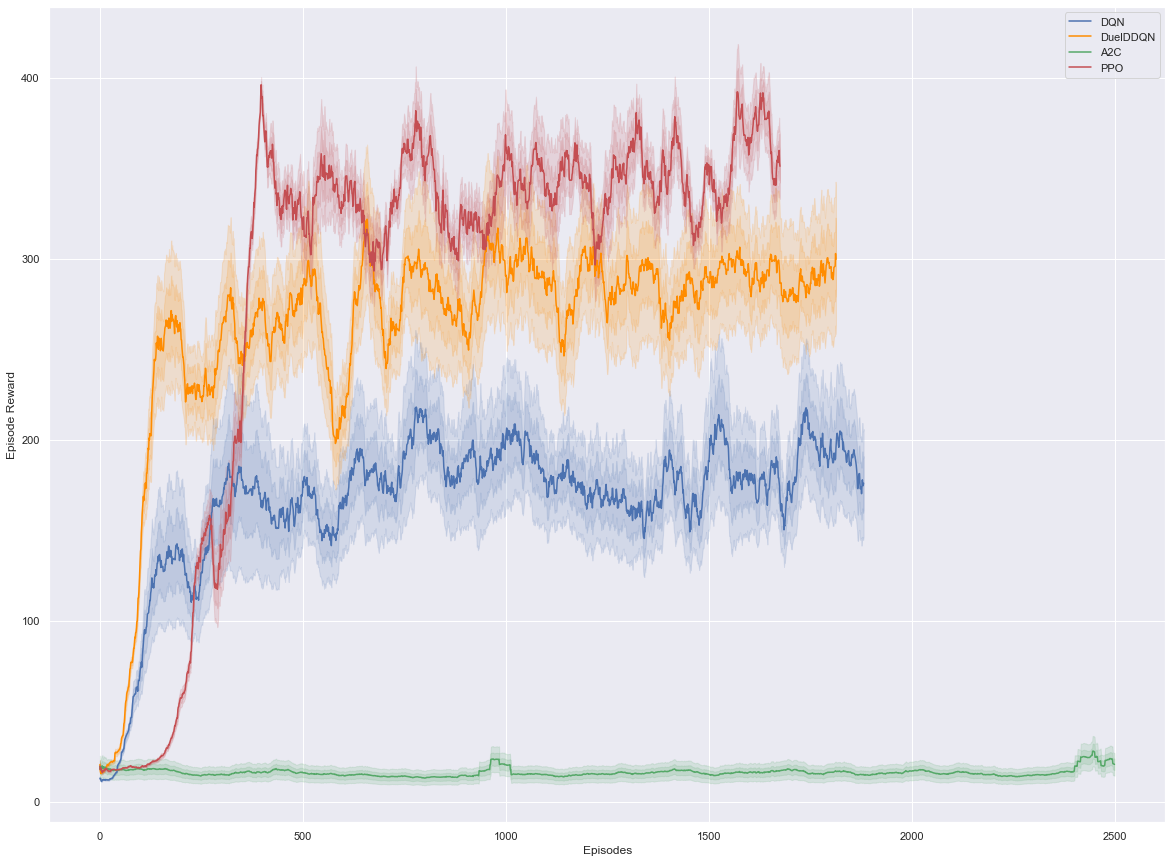

In [14]:
plt.figure(figsize=(20,15))

# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - 0.3*dqn_std, dqn_mean+0.3*dqn_std, alpha=0.15, color="b") 
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - 0.15*dqn_std, dqn_mean+0.15*dqn_std, alpha=0.15, color="b") 


# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - 0.3*ddqn_std, ddqn_mean+0.3*ddqn_std, alpha=0.15, color="darkorange") 
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - 0.15*ddqn_std, ddqn_mean+0.15*ddqn_std, alpha=0.15, color="darkorange") 

# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:2500]
a2c_std = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:2500]
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.3*a2c_std, a2c_mean+0.3*a2c_std, alpha=0.15, color="g") 
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.15*a2c_std, a2c_mean+0.15*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - 0.3*ppo_std, ppo_mean+0.3*ppo_std, alpha=0.15, color="r") 
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - 0.15*ppo_std, ppo_mean+0.15*ppo_std, alpha=0.15, color="r") 


plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Episode Reward");
#plt.savefig(os.path.join(proj_dir, "overleaf images", "default plot no crop.png"), bbox_inches="tight")

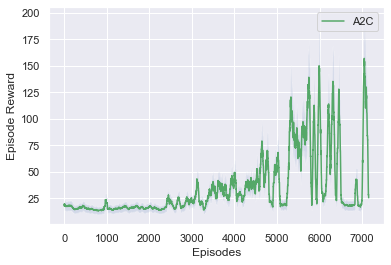

In [58]:
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
a2c_std = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)

plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.25*a2c_std, a2c_mean+0.25*a2c_std, alpha=0.15) 
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Episode Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "a2cplot.png"), bbox_inches="tight")

In [67]:
ddqn_data[0]["final_point"].count("GREEN_FP")/dqn_data[0]["episodes"]

0.07863974495217853